<a href="https://colab.research.google.com/github/YG-0/Datascience_assisgnments/blob/main/Assignment_PCA%2Bkmeans%2Bhirerarchial%2Bhierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [40]:
df = pd.read_csv("wine.csv")

In [41]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [42]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [44]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [45]:
df.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [46]:
df.corr

<bound method DataFrame.corr of      Type  Alcohol  Malic   Ash  ...  Color   Hue  Dilution  Proline
0       1    14.23   1.71  2.43  ...   5.64  1.04      3.92     1065
1       1    13.20   1.78  2.14  ...   4.38  1.05      3.40     1050
2       1    13.16   2.36  2.67  ...   5.68  1.03      3.17     1185
3       1    14.37   1.95  2.50  ...   7.80  0.86      3.45     1480
4       1    13.24   2.59  2.87  ...   4.32  1.04      2.93      735
..    ...      ...    ...   ...  ...    ...   ...       ...      ...
173     3    13.71   5.65  2.45  ...   7.70  0.64      1.74      740
174     3    13.40   3.91  2.48  ...   7.30  0.70      1.56      750
175     3    13.27   4.28  2.26  ...  10.20  0.59      1.56      835
176     3    13.17   2.59  2.37  ...   9.30  0.60      1.62      840
177     3    14.13   4.10  2.74  ...   9.20  0.61      1.60      560

[178 rows x 14 columns]>

In [47]:
df.data = df.iloc[:,1:]
df.data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
DF = df.data.values
DF

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [49]:
df_normal = scale(DF)

In [50]:
df_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [51]:
pca = PCA()
pca_values = pca.fit_transform(df_normal)

In [52]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [53]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(df_normal)

In [54]:
pca_values

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       ...,
       [-2.67783946, -2.76089913, -0.94094188,  0.31203475,  1.271355  ,
         0.27306792],
       [-2.38701709, -2.29734668, -0.5506962 , -0.68828455,  0.81395522,
         1.17878298],
       [-3.20875816, -2.76891957,  1.01391366,  0.59690319, -0.89519259,
         0.29609218]])

In [55]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [56]:
var1 = np.cumsum(np.round(var,decimals = 1)*100)
var1

array([40., 60., 70., 80., 90., 90.])

In [57]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

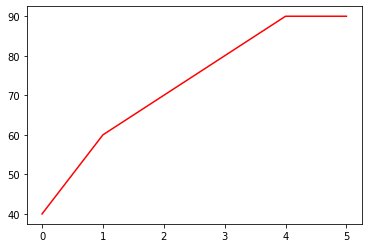

In [58]:
plt.plot(var1,color="red")

In [59]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

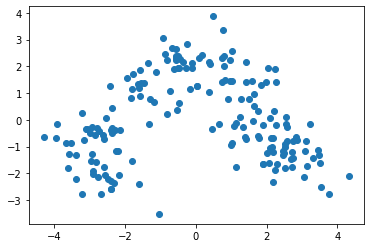

In [60]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

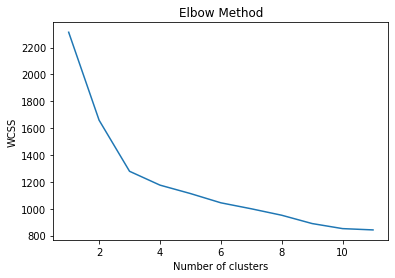

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
print(df.head())

   Type  Alcohol  Malic   Ash  ...  Color   Hue  Dilution  Proline
0     1    14.23   1.71  2.43  ...   5.64  1.04      3.92     1065
1     1    13.20   1.78  2.14  ...   4.38  1.05      3.40     1050
2     1    13.16   2.36  2.67  ...   5.68  1.03      3.17     1185
3     1    14.37   1.95  2.50  ...   7.80  0.86      3.45     1480
4     1    13.24   2.59  2.87  ...   4.32  1.04      2.93      735

[5 rows x 14 columns]


In [65]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [81]:
array=df.values

In [82]:
array


array([[1.710e+00, 2.430e+00, 1.560e+01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [69]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [70]:
X

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [83]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

In [84]:
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [85]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [86]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
173,-1
174,-1
175,-1
176,-1


In [87]:
pd.concat([df,cl],axis=1)

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-1
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-1
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-1
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,-1
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,-1
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-1


In [88]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [89]:
df.head()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [92]:
df_norm = norm_func(df.iloc[:,1:])

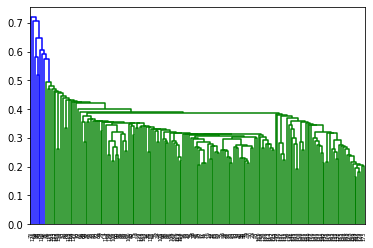

In [93]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [94]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [95]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [96]:
Clusters


,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [97]:
df['h_clusterid'] = Clusters

In [98]:
df

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [99]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.360983,2.367110,19.427746,98.537572,2.287861,2.010636,0.363699,1.565376,5.099075,0.951942,2.599306,746.196532
1,1,1.233333,1.966667,16.866667,149.666667,2.083333,1.800000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667
2,2,2.050000,3.230000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.930000,3.690000,465.000000
3,3,1.670000,2.600000,30.000000,139.000000,3.300000,2.890000,0.210000,1.960000,3.350000,1.310000,3.500000,985.000000
